# Netflix Data Exploration
Netflix is one of the most popular streaming platforms out there. They provied their Users with a variety of Movies and TV Shows around the globe.

## Data Source
Data:
https://www.kaggle.com/shivamb/netflix-shows

Helpful Notebook:
https://www.kaggle.com/andreshg/netflix-analysis-a-graph-story

## Goal
My goal is to gain insight on some statistical data, find out what are the most popular genre and actors. 

Since this is my first Notebook I'll try to use some of the things I learned so far.

## Index
#### 1 Import Libraries and Data
- importing libaries and data

#### 2 First look on Data
- taking a look on the data with (head, columns, shape, dtypes)

#### 3 Cleaning Data
- finding missing values and replacing them

#### 4 Exploring the Data
- Number of Movies and TV Shows
- Number of original releases of Movies and TV Shows each year
- Movie duration
- TV Shows Season count
- Number of Movies and TV Shows added to Netflix each year
- Most/Top Genre, Countrys, Actors
- Wordcloud for Title and Description


#### 5 Conclusion




## Procedure

### 1 Import Libraries and Data

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import (
    STOPWORDS,
    WordCloud
)
from sklearn.preprocessing import MultiLabelBinarizer 
import plotly.graph_objects as go

#import data
df = pd.read_csv('input/netflix_titles.csv')

### 2 First look on Data

In [2]:
#first look on data
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [3]:
display(df.columns, df.shape, df.dtypes)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

(6234, 12)

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

### 3 Cleaning Data
- first I find out how many missing values I have

In [4]:
#looking for missing values
df.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

- almost 1/3 values for director are missing
- I decided to fill it with 'Unknown' since it fits my purpose

In [5]:
#filling missing values with unknown
df.fillna('Unknown', inplace=True)
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### 4 Exploring the Data

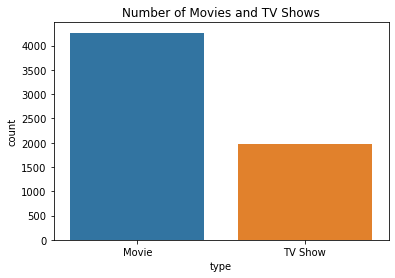

In [6]:
sns.countplot(x='type', data= df).set_title('Number of Movies and TV Shows')
plt.show()

- there are roughly twice the amount of Movies then TV Shows on Netflix

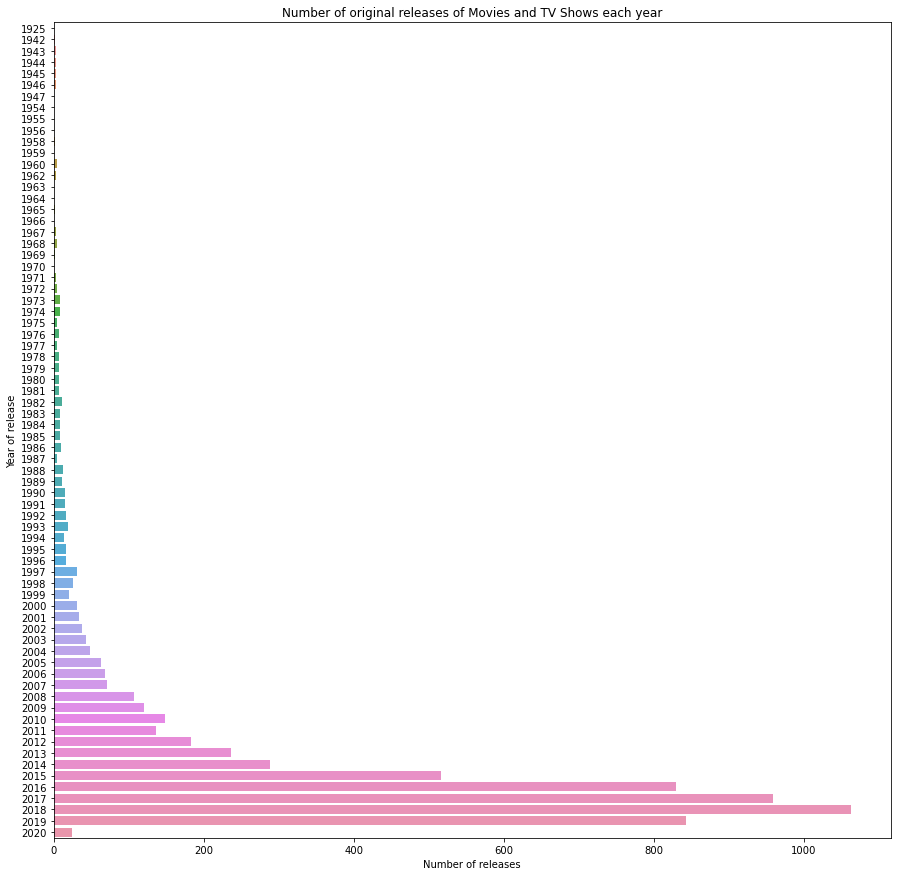

In [7]:
plt.figure(figsize=(15, 15))
sns.countplot(y='release_year', data= df).set_title('Number of original releases of Movies and TV Shows each year')
plt.xlabel("Number of releases")
plt.ylabel("Year of release")
plt.show()

NOTE: These are the original release dates of the Movies/TV Shows not the Netflix release dates.
- there are more newer Movies and TV Shows then older ones
- most Movies/TV Shows on Netflix were released in 2018 
- Netflix uploads more newer movies then older
- the oldest TV Show is "Pioneers: First Women Filmmakers*" released in 1925 and was added in December 30, 2018 to Netflix
- the oldest Movies are "The Battle of Midway" and "Prelude to War" released in 1942 and was added March 31, 2017	to Netflix

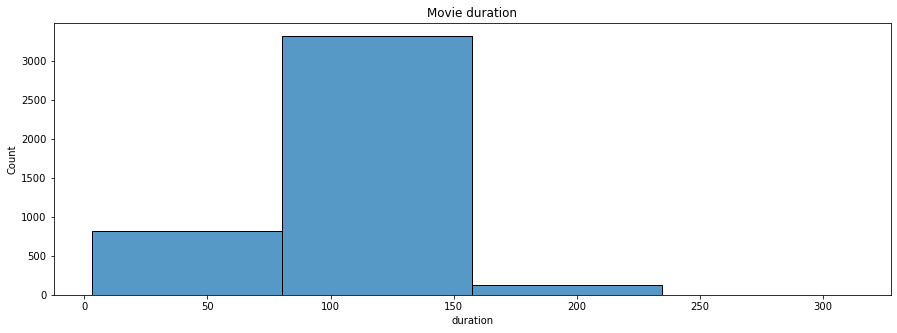

99.10082063305978

In [25]:
#filter Movies from TV Shows, delete 'min', change type
movies = df[df['type'] == 'Movie']
movies.loc[movies.index, 'duration'] = movies.duration.apply(lambda x: x.replace(' min', ''))
movies = movies.astype({'duration': 'int32'})

plt.figure(figsize=(15, 5))
sns.histplot(data=movies, x='duration', bins=4).set_title('Movie duration')
plt.show()
display(movies['duration'].mean())

- the average duration of movies are 99 minutes
- most of the movies have a duration from 80 to 160 minutes

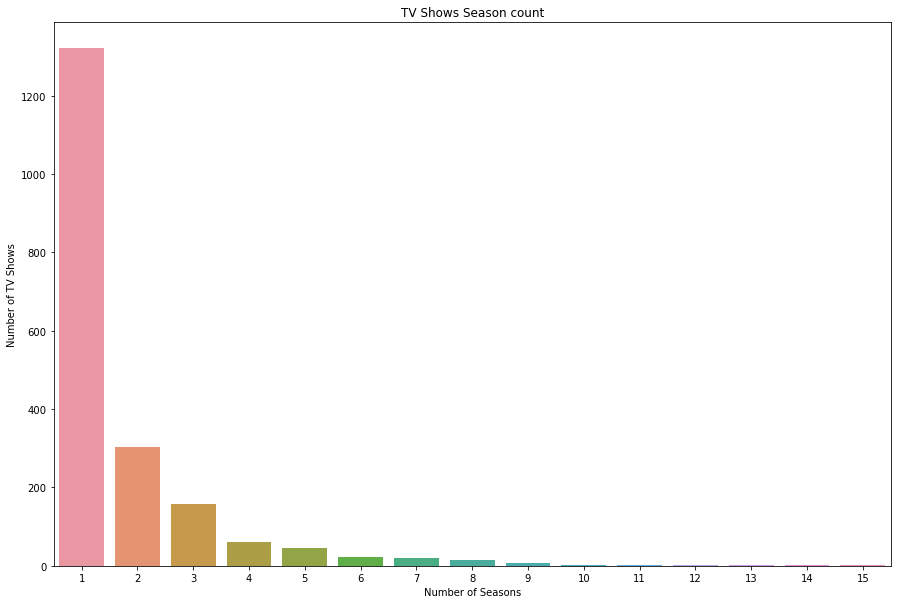

In [28]:
#filter TV Shows from Movies, delete 'season', change type
shows = df[df['type'] == 'TV Show']
shows.loc[shows.index, 'duration'] = shows.duration.apply(lambda x: x.replace(' Seasons', '').replace(' Season', ''))
shows = shows.astype({'duration': 'int32'})

plt.figure(figsize=(15, 10))
sns.countplot(data=shows, x='duration').set_title('TV Shows Season count')
plt.xlabel("Number of Seasons")
plt.ylabel("Number of TV Shows")
plt.show()

- most TV Shows only have 1 Season
- each new season increases the chance the Show gets cancelled (negative correlation)

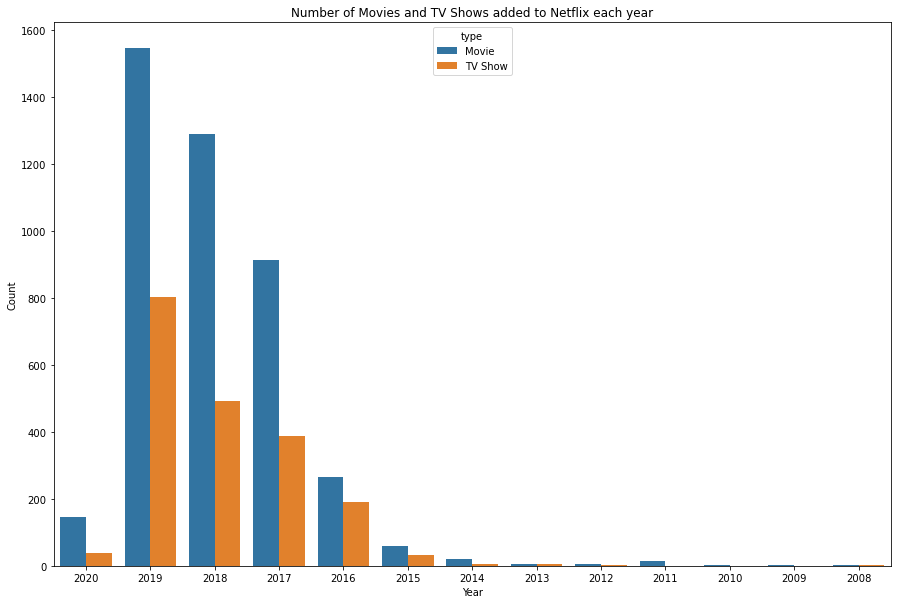

In [10]:
#year added, count how many films/shows added each year
y_added = df[df['date_added'] != 'Unknown']
df['year_added'] = y_added['date_added'].apply(lambda x: x.split(', ')[1])
ya_order = ['2020','2019','2018','2017','2016','2015','2014','2013','2012','2011','2010','2009','2008']

plt.figure(figsize=(15, 10))
sns.countplot(x='year_added', data=df, hue='type', order=ya_order).set_title('Number of Movies and TV Shows added to Netflix each year')
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

- we can see an steady increase in the last years since 2016
- the year 2020 can be ignored, because the data is not up-to-date and missing a lot of data for 2020

In [11]:
#top genre
df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

In [12]:
def calculate_mlb(series):
    mlb = MultiLabelBinarizer()
    mlb_df = pd.DataFrame(mlb.fit_transform(series), columns=mlb.classes_, index=series.index)
    return mlb_df

In [13]:
def top_genres(df, title='Top ones'):
    genres_df = calculate_mlb(df['genre'])
    tdata = genres_df.sum().sort_values(ascending=False).iloc[:20]
    
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=tdata.index,
        y=tdata.values,
    ))
    fig.update_xaxes(categoryorder='total descending')
    fig.update_layout(title=title)
    fig.show()

In [14]:
top_genres(df, title='Top 20 Genres')

    Note: All the Top 20 ... take the Number of appearances on Netflix NOT an actual Rating by Users or something simular
          (since Netflix doesn't have a rating system)
- The biggest genre is 'International Movies' with 1927 movies in it.

In [15]:
#top country
df['country_list'] = df['country'].apply(lambda x:  str(x).replace(' ,',',').replace(', ',',').split(','))

In [16]:
def top_country(df, title='Top ones'):
    country_df = calculate_mlb(df['country_list'])
    tdata = country_df.sum().sort_values(ascending=False).iloc[:20]
    
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=tdata.index,
        y=tdata.values,
    ))
    fig.update_xaxes(categoryorder='total descending')
    fig.update_layout(title=title)
    fig.show()

In [17]:
top_country(df, title='Top 20 Countrys')

- Most Movies/TV Shows were filmed in the United States

In [18]:
#top actor
df['actors'] = df['cast'].apply(lambda x:  str(x).replace(' ,',',').replace(', ',',').split(','))

In [19]:
def top_actors(df, title='Top ones'):
    actors_df = calculate_mlb(df['actors'])
    tdata = actors_df.sum().sort_values(ascending=False).iloc[1:21]
    
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=tdata.index,
        y=tdata.values,
    ))
    fig.update_xaxes(categoryorder='total descending')
    fig.update_layout(title=title)
    fig.show()

In [20]:
top_actors(df, title='Top 20 Actors')

- Anupam Kher played in 33 Movies/TV Shows

Note : there are 570 Unknown (nan) Values for actors

In [21]:
def create_wordcloud(x):
    wordcloud = WordCloud(
        height = 1000,
        width = 1500,
        background_color = 'black',
        stopwords = STOPWORDS).generate(str(' '.join(df[x].values)))
    fig = plt.figure(
        figsize = (30, 20),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

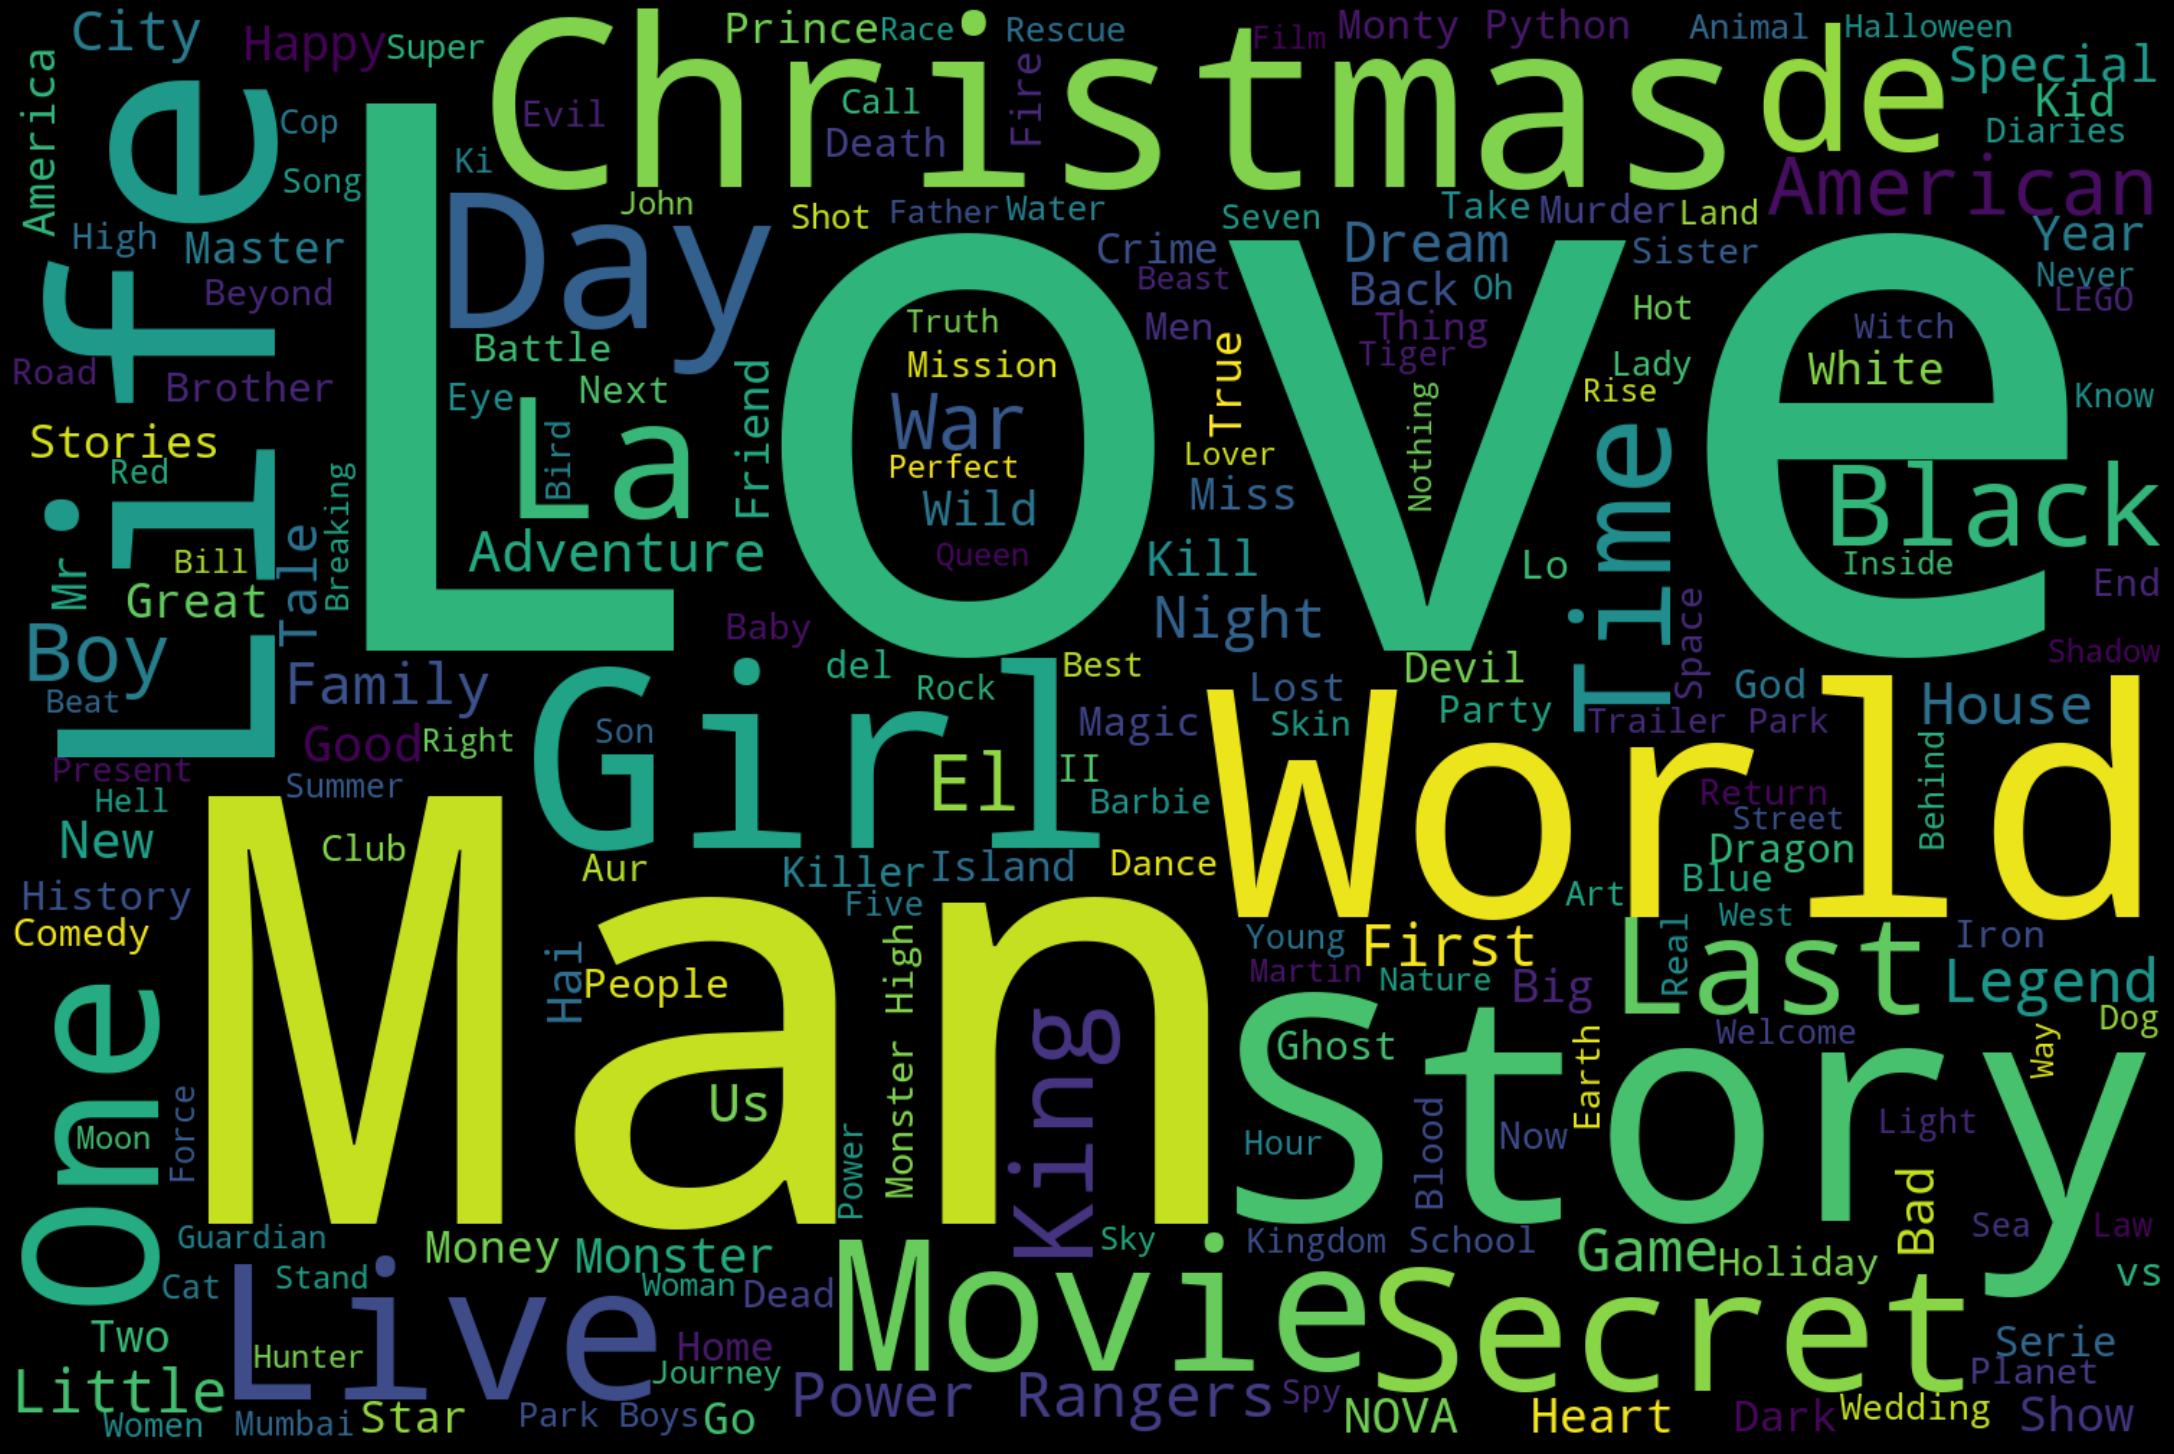

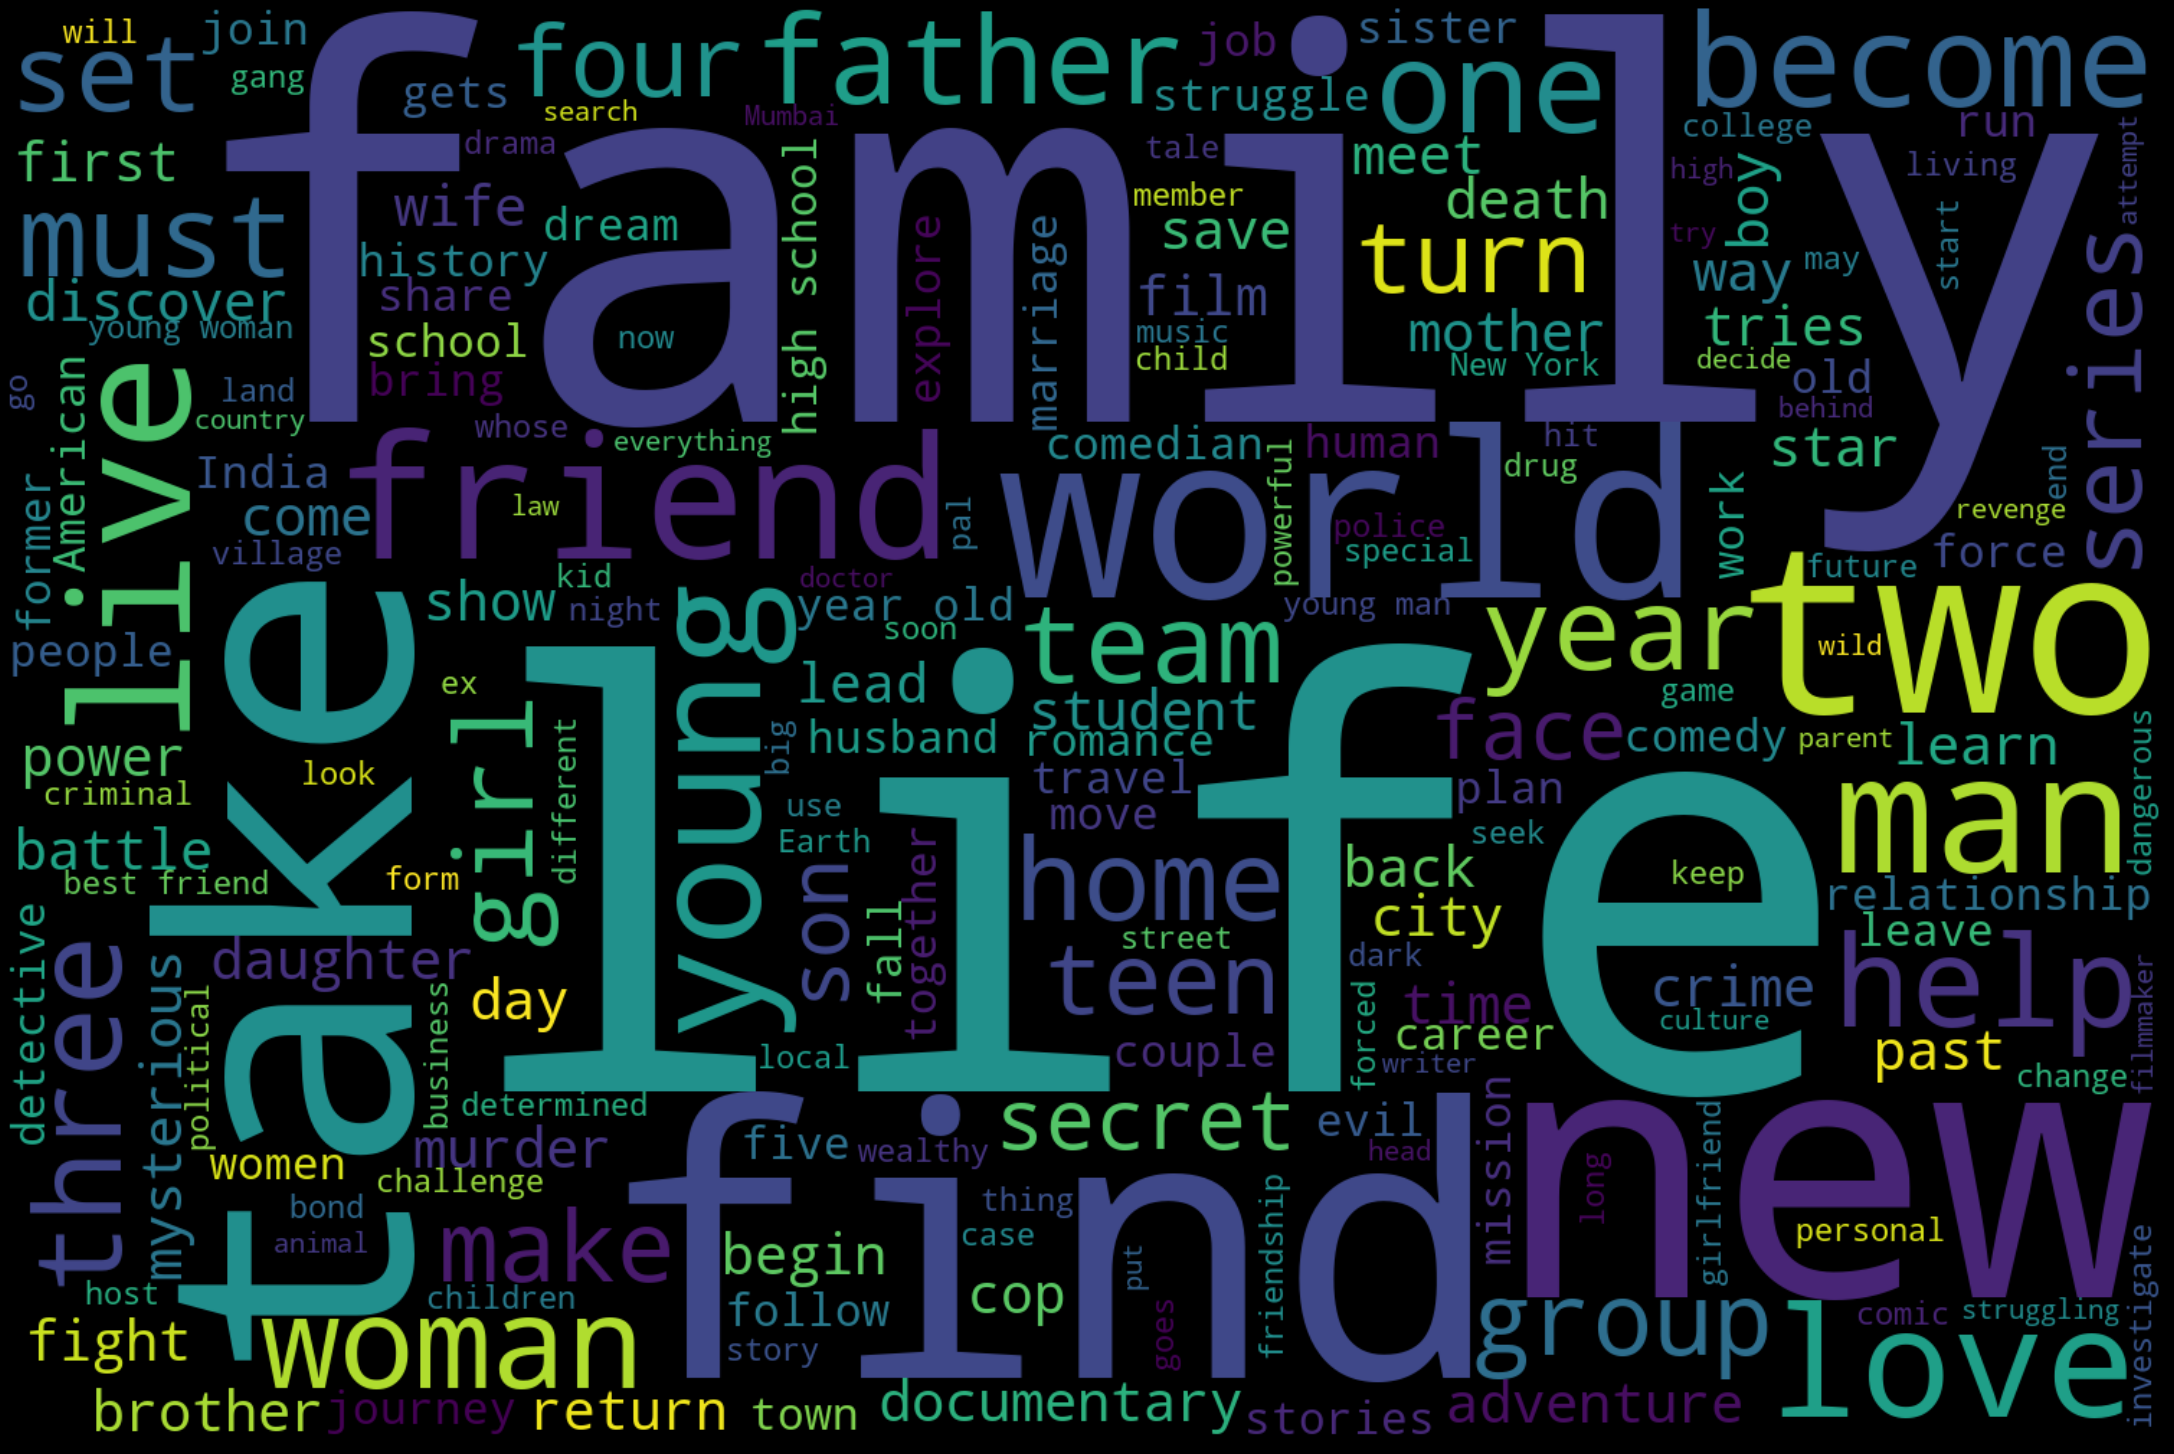

In [22]:
#wordcloud for title and description
create_wordcloud('title')
create_wordcloud('description')

- Most used Words in Titels: 'Love', 'Man' and 'World'
- Most used Words in Descriptions: 'life', 'family', 'find' and 'new'

### 5 Conclusion

- streams twice the amount of movies compared to TV Shows
- uploads more newer movies then older
- the average duration of movies are 99 minutes
- each new season increases the chance the TV Show gets cancelled (negative correlation)
- we can see an steady upload increase in the last years since 2016
- The biggest Movie genre is 'International Movies' with 1927 Movies in it
- The biggest TV Show genre is 'International TV Shows' with 1001 TV Shows in it
- Most Movies/TV Shows were filmed in the United States
- Anupam Kher(actor) played in 33 Movies/TV Shows
- Most used Words in Titels: 'Love', 'Man' and 'World'
- Most used Words in Descriptions: 'life', 'family', 'find' and 'new'